In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize

from nltk import sent_tokenize, word_tokenize 
from nltk.stem.snowball import SnowballStemmer 
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer

import pandas as pd 
import numpy as np 
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
import sklearn.feature_extraction.text 
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score



In [2]:
combined = pd.read_csv('../datasets/combined.csv')
#read in data

In [3]:
#we combine all our data cleaning functions into one function
# this has the same function as the Regex done in the EDA, but i am doing it again just in case i missed out anything
def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML.
    review_text = bs(raw_review).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
    # 5. Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))


In [4]:
combined.head()

,selftext,title,subreddit,all_text,word_count
0,"# Game Threads Index (January 07, 2021):\n\n|T...",Trash Talk Thursday + Game Thread Index,0,Trash Talk Thursday Game Thread Index Game T...,44
1,"Here is a place to have in depth, x's and o's,...",[SERIOUS NEXT DAY THREAD] Post-Game Discussion...,0,SERIOUS NEXT DAY THREAD PostGame Discussion Ja...,119
2,Luka Doncic tonight against the Denver Nuggets...,Luka Doncic tonight against the Denver Nuggets...,0,Luka Doncic tonight against the Denver Nuggets...,47
3,Tim Duncan made a rare podcast appearance on t...,Tim Duncan on who he likes to watch in the NBA...,0,Tim Duncan on who he likes to watch in the NBA...,121
4,\n||\t\t\n|:-:|\t\t\n|[](/PHI) **109 - 122** ...,[Post Game Thread] The Brooklyn Nets (5-4) def...,0,Post Game Thread The Brooklyn Nets defeat the...,115


In [5]:
#function to showcase confusion matrix
def evaluation(y, y_hat, title = 'Confusion Matrix'):
    cm = confusion_matrix(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    accuracy = accuracy_score(y,y_hat)
    f1 = f1_score(y,y_hat)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('F1: ', f1)
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title(title, fontsize=18)
    
    plt.show();

## Baseline Accuracy
- This is the null model
- We need to calculate baseline accuracy in order to tell if our model is outperforming the null model (predicting the majority class).

In [6]:
combined['subreddit'].value_counts(normalize=True)


1    0.5
0    0.5
Name: subreddit, dtype: float64

## Model Prep

- let X be the all_text column
- let y be the subreddit column

In [7]:
X = combined['all_text']
y = combined['subreddit']

## Train/Test Split
- Use the train_test_split function to split your data into a training set and a holdout set.



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [9]:
X_train

1108    Why is Devonte Graham still starting over Lame...
494     MacMahon Doncic says Mavs getting better in th...
3267    Foreigner Fan Manchester Hi\nI know atm there ...
3906    Arsenal having a bad team is a myth Im sorry b...
3597    rPremierLeague Daily Discussion Whats on your ...
                              ...                        
3978    Who isare the most entertaining fans to watch ...
3901    Martial is getting not a  shouts but last seas...
2065    Bruno Fernandes is just a Jack Grealish withou...
2867    How do you rate Fernandinhos career \n\nView P...
3479    Should Liverpool sign a new CB A lot of people...
Name: all_text, Length: 3000, dtype: object

## Preprocessing

In [10]:
combined.shape

(4000, 5)

In [11]:

# Get the number of reviews based on the dataframe size.
total_reviews = combined.shape[0]
print(f'There are {total_reviews} reviews.')

# Initialize an empty list to hold the clean reviews.
clean_train_reviews = []
clean_test_reviews = []

There are 4000 reviews.


In [12]:
print("Cleaning and parsing the training set")

j = 0
for train_review in X_train:
    # Convert review to words, then append to clean_train_reviews.
    clean_train_reviews.append(review_to_words(train_review))
    
    # If the index is divisible by 1000, print a message
    if (j + 1) % 1000 == 0:
        print(f'Review {j + 1} of {total_reviews}.')
    
    j += 1

# Let's do the same for our testing set.

print("Cleaning and parsing the testing set...")

for test_review in X_test:
    # Convert review to words, then append to clean_train_reviews.
    clean_test_reviews.append(review_to_words(test_review))
    
    # If the index is divisible by 1000, print a message
    if (j + 1) % 1000 == 0:
        print(f'Review {j + 1} of {total_reviews}.')
        
    j += 1

Cleaning and parsing the training set
Review 1000 of 4000.
Review 2000 of 4000.
Review 3000 of 4000.
Cleaning and parsing the testing set...
Review 4000 of 4000.


In [57]:
X_train

1108    Why is Devonte Graham still starting over Lame...
494     MacMahon Doncic says Mavs getting better in th...
3267    Foreigner Fan Manchester Hi\nI know atm there ...
3906    Arsenal having a bad team is a myth Im sorry b...
3597    rPremierLeague Daily Discussion Whats on your ...
                              ...                        
3978    Who isare the most entertaining fans to watch ...
3901    Martial is getting not a  shouts but last seas...
2065    Bruno Fernandes is just a Jack Grealish withou...
2867    How do you rate Fernandinhos career \n\nView P...
3479    Should Liverpool sign a new CB A lot of people...
Name: all_text, Length: 3000, dtype: object

## Pipeline

Our pipeline will consist of two stages:
1. LogisticRegression
2. Naive Bayes


**Advantages and Disadvantages of each model** 


**LogisticRegression**
- In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.
- Advantages: Logistic regression is designed for this purpose (classification), and is most useful for understanding the influence of several independent variables on a single outcome variable.
- Disadvantages: Works only when the predicted variable is binary, assumes all predictors are independent of each other and assumes data is free of missing values.



**Naive Bayes**
- Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.
- Advantages: This algorithm requires a small amount of training data to estimate the necessary parameters. Naive Bayes classifiers are extremely fast compared to more sophisticated methods.
- Disadvantages: Naive Bayes is is known to be a bad estimator.

**CountVectorizer & TfidfVectorizer**
- TfidfVectorizer and CountVectorizer both are methods for converting text data into vectors as model can process only numerical data.
- In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.
- To overcome this , we use TfidfVectorizer .
- In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents


**Evaluation and Conclusion will be done at the end of the notebook**

### Logistic Regression model 

#### Countvectorizer

In [13]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

In [14]:
# max_df is used for removing terms that appear too frequently
# max_df = 0.80 means "ignore terms that appear in more than 80% of the documents".
# min_df is used for removing terms that appear too infrequently. 
# min_df = 0.1 means "ignore terms that appear in less than 10% of the documents".
# max_features means that The CountVectorizer will choose the words/features that occur most frequently to be in its’ vocabulary and drop everything else
# ngram_range refers to a string of n words in a row. E.g. the sentence ‘I am Groot’ contains the 2-grams ‘I am’ and ‘am Groot’. The sentence is itself a 3-gram.


pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [0.05, 0.1],
    'cvec__max_df': [.8, .9],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

0.947


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'cvec__max_df': 0.9,
 'cvec__max_features': 2500,
 'cvec__min_df': 0.05,
 'cvec__ngram_range': (1, 2)}

In [15]:
gs.score(X_train, y_train)


0.9763333333333334

In [16]:
gs.score(X_test, y_test)


0.958

### Evaluation

In [17]:
preds = gs.predict(X_test)

In [18]:
# Save TN/FP/FN/TP values.

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# What is the specificity of our test set?
spec = tn / (tn + fp)
print(f'Specificity: {round(spec,4)}')

# What is the sensitivity of our test set?
sens = tp / (tp + fn)
print(f'Sensitivity: {round(sens,4)}')

# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in gs.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
pred_df

Specificity: 0.972
Sensitivity: 0.944


,true_values,pred_probs
3886,1,0.999963
2164,1,0.999974
2150,1,0.982090
3423,1,0.958470
1678,0,0.000002
...,...,...
207,0,0.014587
476,0,0.011411
2943,1,0.865566
1552,0,0.091194


Recall:  0.944
Accuracy:  0.958
Precision:  0.9711934156378601
F1:  0.9574036511156186


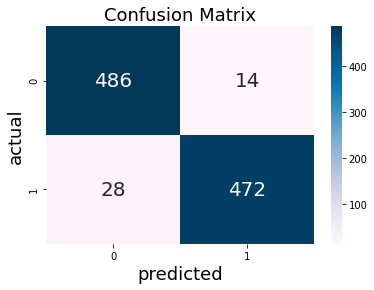

In [19]:
evaluation(y_test, preds, title = 'Confusion Matrix')


## ROC curve

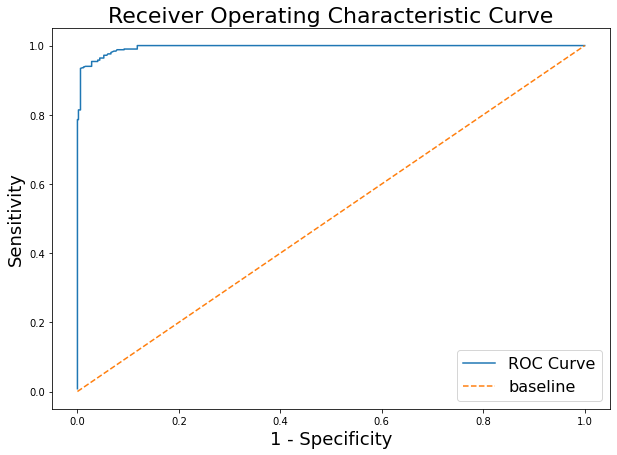

In [20]:
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

## ROC AUC

In [21]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])


0.9954719999999999

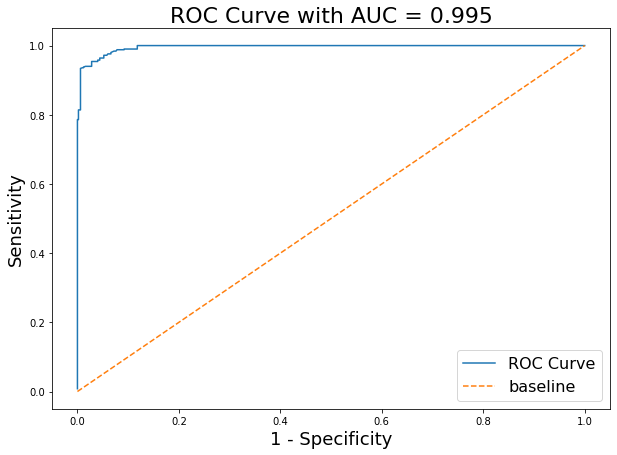

In [22]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

#### tfidvectorizer

In [23]:
pipe = Pipeline([
    ('tfidf_vec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

In [24]:
# tfidf_vec.get_params().keys()

In [25]:
# max_df is used for removing terms that appear too frequently
# max_df = 0.80 means "ignore terms that appear in more than 80% of the documents".
# min_df is used for removing terms that appear too infrequently. 
# min_df = 0.1 means "ignore terms that appear in less than 10% of the documents".
# max_features means that The CountVectorizer will choose the words/features that occur most frequently to be in its’ vocabulary and drop everything else
# ngram_range refers to a string of n words in a row. E.g. the sentence ‘I am Groot’ contains the 2-grams ‘I am’ and ‘am Groot’. The sentence is itself a 3-gram.

pipe_params = {
    'tfidf_vec__max_features': [2500, 3000, 3500],
    'tfidf_vec__min_df': [0.05, 0.1],
    'tfidf_vec__max_df': [.8, .9],
    'tfidf_vec__ngram_range': [(1,1), (1,2)]
}


In [26]:
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8936666666666667


{'tfidf_vec__max_df': 0.8,
 'tfidf_vec__max_features': 2500,
 'tfidf_vec__min_df': 0.05,
 'tfidf_vec__ngram_range': (1, 2)}

### Evaluation

In [27]:
# pipe.fit(X_train, y_train)
preds = gs.predict(X_test)

In [28]:


# # Generate confusion matrix.
# # Documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# confusion_matrix(y_test, # True values.
#                  preds)  # Predicted values.

In [29]:
# Save TN/FP/FN/TP values.

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# What is the specificity of our test set?
spec = tn / (tn + fp)
print(f'Specificity: {round(spec,4)}')

# What is the sensitivity of our test set?
sens = tp / (tp + fn)
print(f'Sensitivity: {round(sens,4)}')

# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in gs.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
pred_df

Specificity: 0.926
Sensitivity: 0.88


,true_values,pred_probs
3886,1,0.928475
2164,1,0.897168
2150,1,0.892751
3423,1,0.757081
1678,0,0.107362
...,...,...
207,0,0.063648
476,0,0.129371
2943,1,0.653755
1552,0,0.316193


Recall:  0.88
Accuracy:  0.903
Precision:  0.9224318658280922
F1:  0.9007164790174003


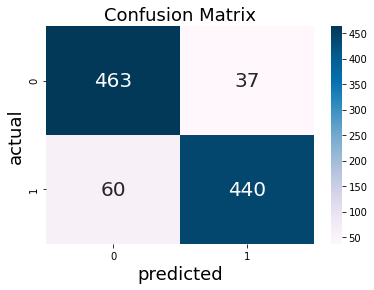

In [30]:
evaluation(y_test, preds, title = 'Confusion Matrix')


## ROC curve


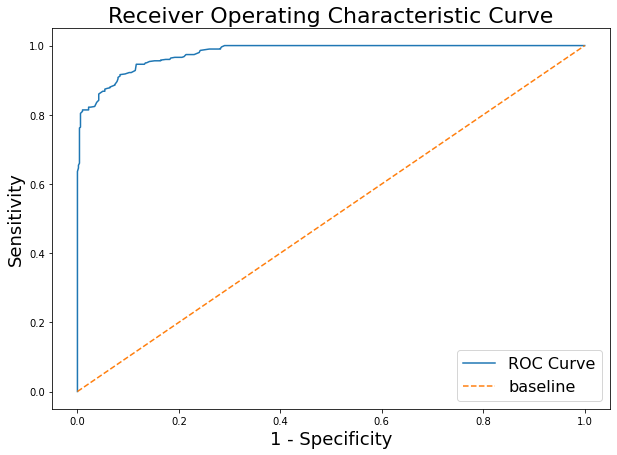

In [31]:
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

In [32]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])


0.978784

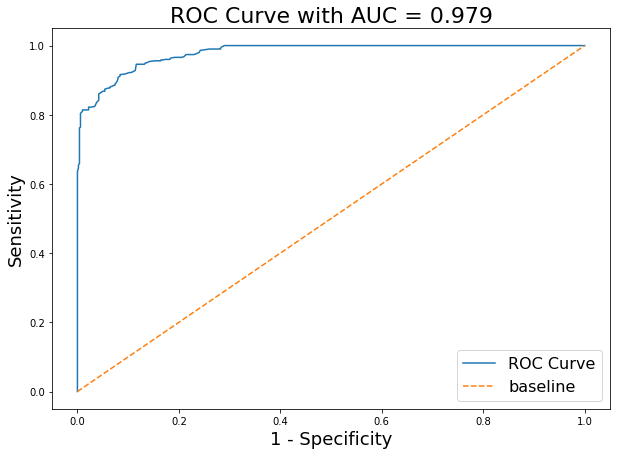

In [33]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

### Naive Bayes Model

#### CountVectorizer

In [34]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('naive_bayes', MultinomialNB())])

In [35]:
# max_df is used for removing terms that appear too frequently
# max_df = 0.80 means "ignore terms that appear in more than 80% of the documents".
# min_df is used for removing terms that appear too infrequently. 
# min_df = 0.1 means "ignore terms that appear in less than 10% of the documents".
# max_features means that The CountVectorizer will choose the words/features that occur most frequently to be in its’ vocabulary and drop everything else
# ngram_range refers to a string of n words in a row. E.g. the sentence ‘I am Groot’ contains the 2-grams ‘I am’ and ‘am Groot’. The sentence is itself a 3-gram.

#best_params_ sets the Parameter that gave the best results on the hold out data.

pipe_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9726666666666666


{'cvec__max_df': 0.9,
 'cvec__max_features': 3500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}

In [36]:
gs.score(X_train, y_train)


0.9823333333333333

In [37]:
gs.score(X_test, y_test)


0.982

### Evaluation

In [38]:
# pipe.fit(X_train, y_train)
preds = gs.predict(X_test)

In [39]:
# Save TN/FP/FN/TP values.

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# What is the specificity of our test set?
spec = tn / (tn + fp)
print(f'Specificity: {round(spec,4)}')

# What is the sensitivity of our test set?
sens = tp / (tp + fn)
print(f'Sensitivity: {round(sens,4)}')

# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in gs.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
pred_df

Specificity: 0.968
Sensitivity: 0.996


,true_values,pred_probs
3886,1,1.000000e+00
2164,1,1.000000e+00
2150,1,1.000000e+00
3423,1,9.999978e-01
1678,0,3.128756e-28
...,...,...
207,0,4.658550e-20
476,0,9.266671e-83
2943,1,9.999996e-01
1552,0,2.046905e-06


Recall:  0.996
Accuracy:  0.982
Precision:  0.9688715953307393
F1:  0.9822485207100591


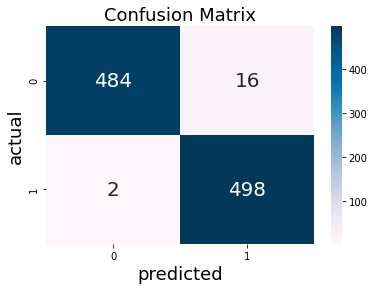

In [40]:
evaluation(y_test, preds, title = 'Confusion Matrix')


## ROC curve

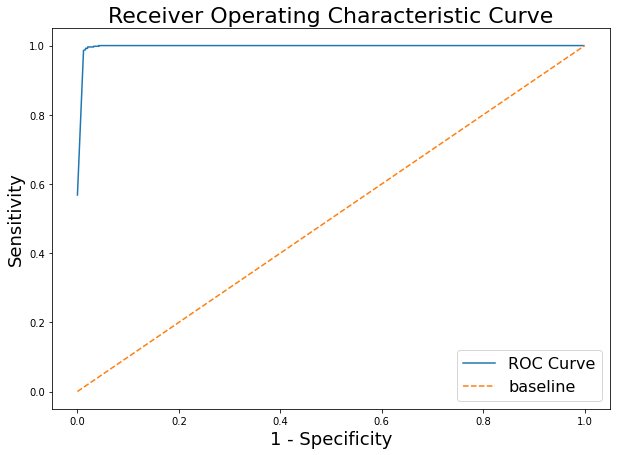

In [41]:
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

## ROC AUC

In [42]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])


0.999204

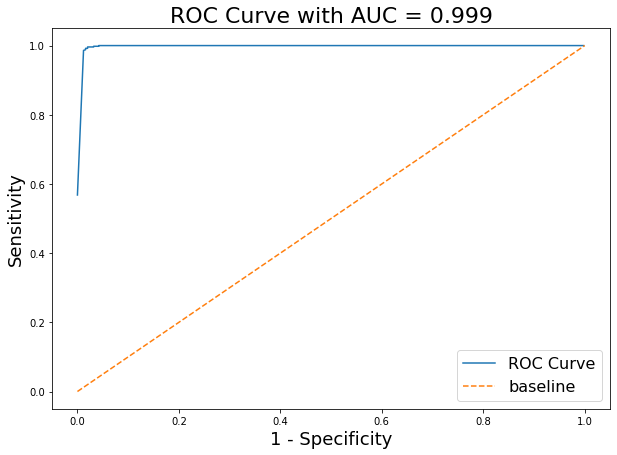

In [43]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

#### tfidvectorizer

In [44]:
pipe = Pipeline([
    ('tfidf_vec', TfidfVectorizer()),
    ('naive_bayes', MultinomialNB())])

In [45]:
# tfidf_vec.get_params().keys()

In [46]:
# max_df is used for removing terms that appear too frequently
# max_df = 0.80 means "ignore terms that appear in more than 80% of the documents".
# min_df is used for removing terms that appear too infrequently. 
# min_df = 0.1 means "ignore terms that appear in less than 10% of the documents".
# max_features means that The CountVectorizer will choose the words/features that occur most frequently to be in its’ vocabulary and drop everything else
# ngram_range refers to a string of n words in a row. E.g. the sentence ‘I am Groot’ contains the 2-grams ‘I am’ and ‘am Groot’. The sentence is itself a 3-gram.

pipe_params = {
    'tfidf_vec__max_features': [2500, 3000, 3500],
    'tfidf_vec__min_df': [0.05, 0.1],
    'tfidf_vec__max_df': [.8, .9],
    'tfidf_vec__ngram_range': [(1,1), (1,2)]
}

In [47]:
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8533333333333332


{'tfidf_vec__max_df': 0.8,
 'tfidf_vec__max_features': 2500,
 'tfidf_vec__min_df': 0.05,
 'tfidf_vec__ngram_range': (1, 2)}

In [48]:
gs.score(X_train, y_train)


0.863

In [49]:
gs.score(X_test, y_test)


0.876

### Evaluation

In [50]:
# pipe.fit(X_train, y_train)
preds = gs.predict(X_test)

In [51]:
# Save TN/FP/FN/TP values.

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

# What is the specificity of our test set?
spec = tn / (tn + fp)
print(f'Specificity: {round(spec,4)}')

# What is the sensitivity of our test set?
sens = tp / (tp + fn)
print(f'Sensitivity: {round(sens,4)}')

# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in gs.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
pred_df

Specificity: 0.872
Sensitivity: 0.88


,true_values,pred_probs
3886,1,0.925712
2164,1,0.901933
2150,1,0.764603
3423,1,0.690342
1678,0,0.276665
...,...,...
207,0,0.174330
476,0,0.340207
2943,1,0.625038
1552,0,0.496433


Recall:  0.88
Accuracy:  0.876
Precision:  0.873015873015873
F1:  0.8764940239043826


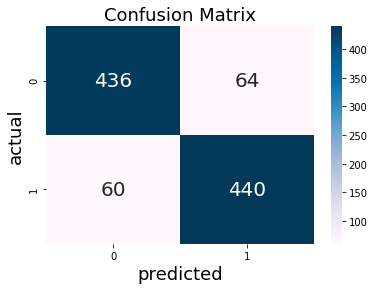

In [52]:
evaluation(y_test, preds, title = 'Confusion Matrix')


## ROC curve

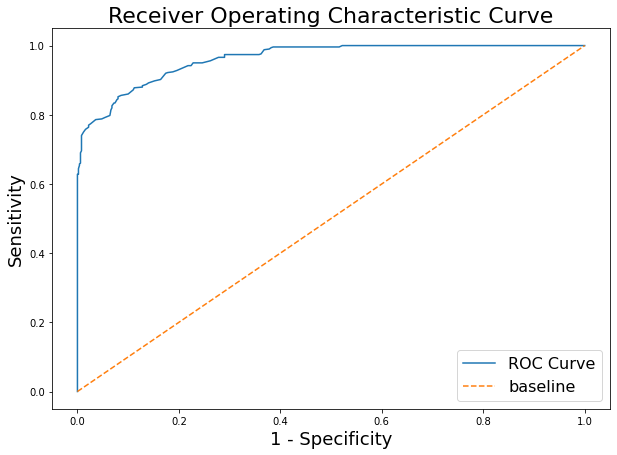

In [53]:
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

## ROC AUC

In [54]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])


0.9619439999999999

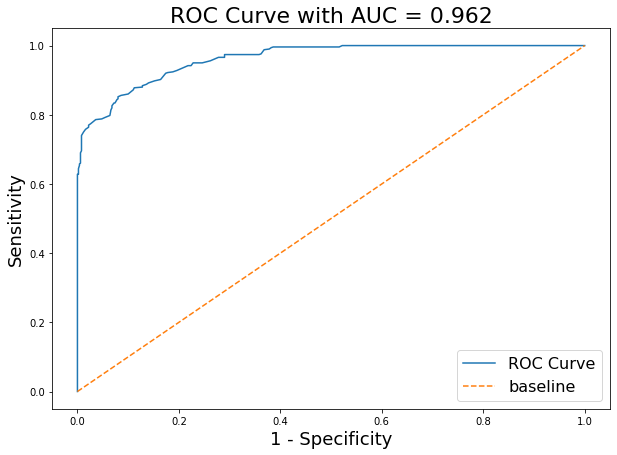

In [55]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

## **Final Model evaluation**

### ROC AUC Score
* log reg / count vec - 0.995
* log reg / tfidf - 0.979
* naive bayes / count vec - 0.999
* naive bayes / tfidf - 0.962



### **Explanation**
- The area under the ROC curve of a test can be used as a criterion to measure the test's discriminative ability, i.e. how good is the test in a given clinical situation. Generally, tests are categorized based on the area under the ROC curve.
- Since there is no imbalanced dataset, as both classes make up 50% of the dataset, we use the AUC for evaluation and choosing the model instead of the F1 score, which optimizes for both classes, positive and negative.

- The closer an ROC curve is to the upper left corner, the more efficient is the test.

- Thus, the model that uses naive bayes and count vectorizer is superior to the rest of the models because at all cut-offs the true positive rate is higher and the false positive rate. 
- The area under the curve for this model (AUC = 0.99547) is larger than the area under the curve for the rest of the models.

## Conclusion and Recommendations

- The use of the naive bayes / count vec model is encouraged as it produces the highest ROC AUC Score.
- More on how the findings could be applied to the problem statement is found on the README.md file